## Definition & Importation

In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft

def decoherence_rho():
    state1=np.array([1,0,0,0,0,1]);
    state1=qt.Qobj(state1).unit();
    state2=np.array([0,1,0,0,1,0]);
    state2=qt.Qobj(state2).unit();
    state3=np.array([0,0,1,1,0,0]);
    state3=qt.Qobj(state3).unit();

    decoherence_rho=state1*qt.dag(state1)/16+state2*qt.dag(state2)*5/16+state3*qt.dag(state3)*10/16;
    decoherence_rho=qt.mesolve(qt.spin_Jz(5/2),decoherence_rho,[0,np.pi*3/2]);
    decoherence_rho=decoherence_rho.states[1];
    return decoherence_rho

def phase_of(rho):
    state_up=np.array([1,0,0,0,0,0]);
    state_down=np.array([0,0,0,0,0,1]);
    state_up=qt.Qobj(state_up);
    state_down=qt.Qobj(state_down);
    
    phase1=qt.dag(state_up)*rho*state_up;
    phase2=qt.dag(state_down)*rho*state_down;
    phase1=np.absolute(phase1[0,0]);
    phase2=np.absolute(phase2[0,0])
    phase=(phase1-phase2)/(phase1+phase2);
    
    return phase

def upstate(rho):
    state_up=np.array([1,0,0,0,0,0]);
    state_down=np.array([0,0,0,0,0,1]);
    state_up=qt.Qobj(state_up);
    state_down=qt.Qobj(state_down);
    
    phase1=qt.dag(state_up)*rho*state_up;
    phase2=qt.dag(state_down)*rho*state_down;
    phase1=np.absolute(phase1[0,0]);
    phase2=np.absolute(phase2[0,0]);
    
    return phase1

def downstate(rho):
    state_up=np.array([1,0,0,0,0,0]);
    state_down=np.array([0,0,0,0,0,1]);
    state_up=qt.Qobj(state_up);
    state_down=qt.Qobj(state_down);
    
    phase1=qt.dag(state_up)*rho*state_up;
    phase2=qt.dag(state_down)*rho*state_down;
    phase1=np.absolute(phase1[0,0]);
    phase2=np.absolute(phase2[0,0]);
    
    return phase2
sigmax=qt.spin_Jx(5/2);
sigmay=qt.spin_Jy(5/2);
sigmaz=qt.spin_Jz(5/2);

## Main

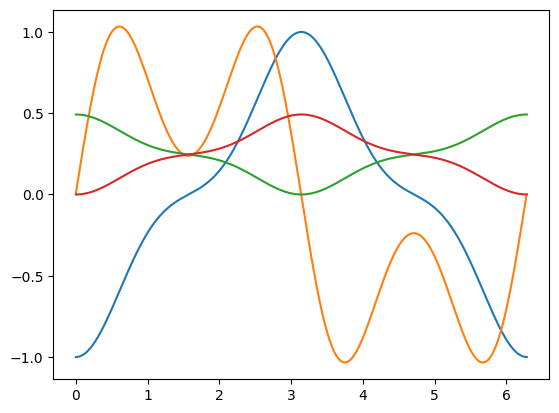

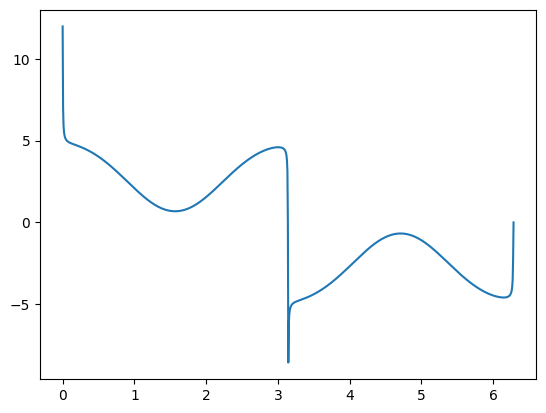

In [2]:
timelength=1;
timelist=np.array(np.linspace(0,2*timelength*np.pi,1000));
initial_rho=decoherence_rho();
state_solve=qt.mesolve(sigmaz,initial_rho,timelist);
final_pop=[0 for i in timelist];
up_pop=[0 for i in timelist];
down_pop=[0 for i in timelist];

for i in range(0,len(timelist)):
    precess_time=timelist[i];
    final_rho=qt.mesolve(sigmax,state_solve.states[i],[0,np.pi/2])
    final_pop[i]=phase_of(final_rho.states[1]);
    up_pop[i]=upstate(final_rho.states[1]);
    down_pop[i]=downstate(final_rho.states[1]);
    

plt.plot(timelist,final_pop)

slope=[0 for i in range(0,len(timelist))];
for i in range(0,len(slope)-1):
    slope[i]=(final_pop[i+1]-final_pop[i])/(timelist[i+1]-timelist[i]);

slope[-1]=0
plt.plot(timelist,slope)
plt.plot(timelist,down_pop)
plt.plot(timelist,up_pop)


fisher=[0 for i in timelist]
for i in range(0,len(slope)):
    fisher[i]=slope[i]*np.sqrt(1/up_pop[i]+1/down_pop[i])

plt.figure()   
plt.plot(timelist,fisher);

/var/folders/3d/x2cx37fd0b16v3tl6qfx6sp80000gn/T/ipykernel_82090/618597191.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  judge_sim[i]=slope_sim[i]*np.sqrt(1/(up_sim[i]*down_sim[i]));
/var/folders/3d/x2cx37fd0b16v3tl6qfx6sp80000gn/T/ipykernel_82090/618597191.py:13: RuntimeWarning: invalid value encountered in double_scalars
  judge_sim[i]=slope_sim[i]*np.sqrt(1/(up_sim[i]*down_sim[i]));


Text(0.5, 1.0, 'Parity')

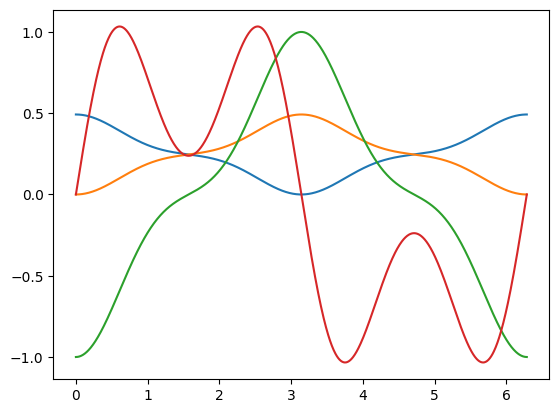

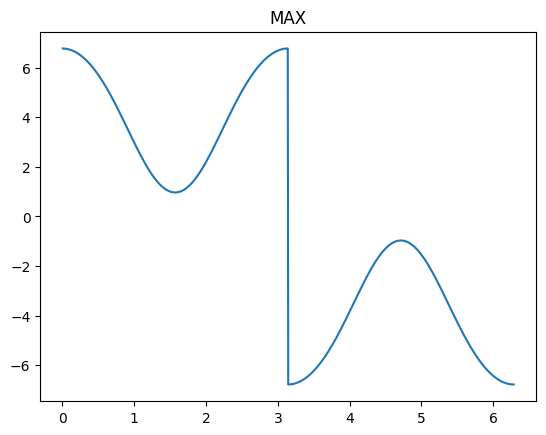

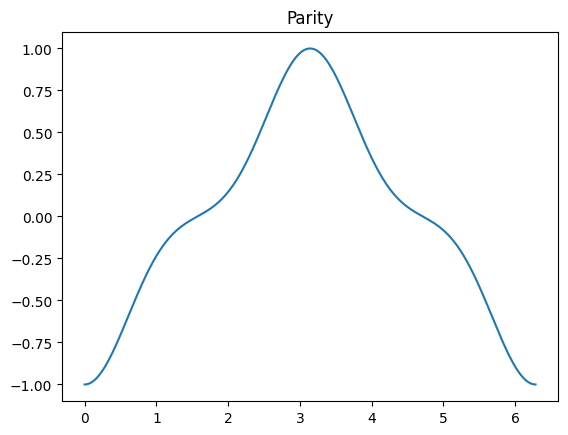

In [5]:
up_sim=[0 for i in timelist]
down_sim=[0 for i in timelist]
phase_sim=[0 for i in timelist]
slope_sim=[0 for i in timelist]
judge_sim=[0 for i in timelist]

for i in range(0,len(timelist)):
    time=timelist[i]
    up_sim[i]=(1/16)**2*np.cos(5/2*time)**2+(5/16)**2*np.cos(3/2*time)**2+(10/16)**2*np.cos(time/2)**2;
    down_sim[i]=(1/16)**2*np.sin(5/2*time)**2+(5/16)**2*np.sin(3/2*time)**2+(10/16)**2*np.sin(time/2)**2;
    phase_sim[i]=(down_sim[i]-up_sim[i])/(up_sim[i]+down_sim[i]);
    slope_sim[i]=((1/16)**2*5*np.sin(5*time)+(5/16)**2*3*np.sin(3*time)+(10/16)**2*np.sin(time))/(63/128);
    judge_sim[i]=slope_sim[i]*np.sqrt(1/(up_sim[i]*down_sim[i]));
    
plt.figure()
plt.plot(timelist,up_sim)
plt.plot(timelist,down_sim)
plt.plot(timelist,phase_sim)
plt.plot(timelist,slope_sim)

plt.figure()
plt.plot(timelist,judge_sim)
plt.title("MAX")

plt.figure()
plt.plot(timelist,phase_sim)
plt.title("Parity")